In [1]:
import vaex
import numpy as np
from glob import glob
from matplotlib import pyplot as plt
from os.path import join, abspath
from scipy.stats import poisson
import sys
from os import pardir
from tqdm import tqdm

In [2]:
current = abspath('')
root_dir = abspath(join(current, pardir))
root_dir

'/home2/s20321005/Thesis-Project'

In [3]:
if root_dir not in sys.path:
    sys.path.append(root_dir)
sys.path

['/home2/s20321005/Thesis-Project/3_Vertical_Velocity',
 '/home2/s20321005/.conda/envs/vaex/lib/python38.zip',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/lib-dynload',
 '',
 '/home2/s20321005/.local/lib/python3.8/site-packages',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages',
 '/home2/s20321005/Thesis-Project']

In [4]:
from utils import safe_mkdir, style

style()

In [5]:
root_data_dir = abspath(join(root_dir, "Data"))
root_data_dir

'/home2/s20321005/Thesis-Project/Data'

In [6]:
name = "no"
spectral_dir = join(root_data_dir, "Color", name)
spectral_dir

'/home2/s20321005/Thesis-Project/Data/Color/no'

In [7]:
vel_dir = join(root_data_dir, "Velocity-Distribution")
safe_mkdir(vel_dir)
vel_dir = join(root_data_dir, "Velocity-Distribution", name)
safe_mkdir(vel_dir)

Directory /home2/s20321005/Thesis-Project/Data/Velocity-Distribution already exist. Good to go!
Directory /home2/s20321005/Thesis-Project/Data/Velocity-Distribution/no already exist. Good to go!


In [8]:
files = glob(join(spectral_dir, "gaia*.hdf5"))
files.sort()
files

['/home2/s20321005/Thesis-Project/Data/Color/no/gaia_(-0.019)_(0.127).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/no/gaia_(0.127)_(0.190).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/no/gaia_(0.190)_(0.220).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/no/gaia_(0.220)_(0.242).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/no/gaia_(0.242)_(0.260).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/no/gaia_(0.260)_(0.276).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/no/gaia_(0.276)_(0.289).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/no/gaia_(0.289)_(0.301).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/no/gaia_(0.301)_(0.313).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/no/gaia_(0.313)_(0.325).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/no/gaia_(0.325)_(0.335).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/no/gaia_(0.335)_(0.345).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/no/gaia_(0.345)_(0.355).hdf5',
 '/home2/s2

In [9]:
index = 0
gaia = vaex.open(files[index])
gaia = gaia.filter("abs(z)<50").filter("rv>-999")
gaia = gaia.extract()
gaia

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,designation,use_src,rd_flg,subclass_lamost,rv,rv_cat,rv_el,rv_eu,rv_sym,teff,teff_cat,teff_el,teff_eu,teff_sym,logg,logg_cat,logg_el,logg_eu,logg_sym,feh,feh_cat,feh_el,feh_eu,feh_sym,mh,mh_cat,mh_el,mh_eu,mh_sym,alphafe,alphafe_cat,alphafe_el,alphafe_eu,alphafe_sym,alpham,alpham_cat,alpham_el,alpham_eu,alpham_sym,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,e_rv,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper
0,0.016132811314469423,0.8453833320993638,6.625999927520752,6.639999866485596,AAA,393289609837293312,26.449678421020508,-24.96840807175537,0.02289041317999363,-8.72720196130603,0.02212526649236679,7.549027097652189,0.02850569225847721,6.791180610656738,6.807115077972412,6.732668399810791,2223.919189453125,1461.660400390625,0.9565751552581787,1.1588934659957886,-1.1377109201305777,-0.23877740044822038,132.62339782714844,132.01100158691406,133.18209838867188,0.18000000715255737,0.17739999294281006,0.18330000340938568,nan,nan,nan,A,00034184+4826128,1,111,--,-1.7445670366287231,gaia,0.21633543074131012,0.21633543074131012,1.0,9896.3720703125,gspphot,26.314453125,29.6044921875,0.0,4.000199794769287,gspphot,0.0028998851776123047,0.0026001930236816406,0.0,nan,--,nan,nan,nan,-1.312999963760376,gspphot,0.025600075721740723,0.044299960136413574,0.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan,-0.01399993896484375,1.0154548490130217,132.46740103913635,-31.33051301020285,128.70901791475563,-26.169521007775085,-3.8394825087166535,0.022863400441453286,0.022153179301464352,0.21633543074131012,-2.4107937163157125,-16.431723978767078,-0.01662394518201199,-0.06368651554562112,-1.9297782652825481,0.05365549699000003,-2.2652585580374547,0.21023430212550667,13.963999868961707,0.10548031529919125,-8.952075564291684,0.19268714834395329,0.7244042138750783,1.9047184755132989
1,0.007327607784865514,1.0824205120699932,7.697999954223633,7.6020002365112305,AAA,429910184639924864,30.434906005859375,-9.994043222039021,0.020594893023371696,-28.747219518666515,0.023014497011899948,6.966705618099453,0.022135332226753235,8.100255966186523,8.185784339904785,7.919078350067139,1736.6217041015625,2342.297607421875,0.9306333661079407,1.1676572561264038,-1.0972707084924957,-0.005097484666529203,144.53489685058594,144.37939453125,144.69949340820312,0.6830000281333923,0.6814000010490417,0.6848999857902527,nan,nan,nan,A,00014076+6201052,1,111,--,-0.45222681760787964,gaia,0.47323763370513916,0.47323763370513916,1.0,11437.2587890625,gspphot,23.1826171875,26.4521484375,0.0,4.480500221252441,gspphot,0.0017004013061523438,0.0020999908447265625,0.0,nan,--,nan,nan,nan,-0.4147999882698059,gspphot,0.009000003337860107,0.0073999762535095215,0.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan,0.09599971771240234,1.9131372520980765,143.53986730858944,-0.7316891038872795,143.5380024175574,-15.319952150479443,-26.29795802121156,0.020688835232181204,0.022930084781581893,0.47323763370513916,-17.89257761899641,-10.423373280566816,-0.05895195986956449,-0.03598550689191674,-17.890039946715522,0.05900052977702957,-0.5434276872756553,0.4732315807438595,9.028630721199267,0.21816967620486805,-5.236969686521851,0.42147962952468204,0.9006046342372868,2.2584710915475363
2,0.007234878441707054,1.2847693604236983,6.0980000495910645,6.019000053405762,AAA,537612876192148096,77.72052764892578,76.77026583536666,0.027028078213334084,-12.116401093805914,0.030883455649018288,14.336634017840032,0.02442546933889389,6.480009078979492,6.557765960693359,6.310624599456787,1129.3505859375,1816.7000732421875,1.1034117937088013,1.1670989990234375,-1.0580185060772953,0.1934567938988277,69.71549987792969,69.51439666748047,69.94170379638672,0.002300000051036477,0.000500000023748725

In [10]:
gaia["rv_sym"].sum()

array(1012.)

In [11]:
for file in files:
    u = vaex.open(file)
    u = u.filter("abs(z)<50")
    u = u.extract()
    name = file.split("/")[-1]
    print(name, len(u))

gaia_(-0.019)_(0.127).hdf5 1012
gaia_(0.127)_(0.190).hdf5 1031
gaia_(0.190)_(0.220).hdf5 1008
gaia_(0.220)_(0.242).hdf5 1038
gaia_(0.242)_(0.260).hdf5 1039
gaia_(0.260)_(0.276).hdf5 1055
gaia_(0.276)_(0.289).hdf5 1022
gaia_(0.289)_(0.301).hdf5 1018
gaia_(0.301)_(0.313).hdf5 1089
gaia_(0.313)_(0.325).hdf5 1073
gaia_(0.325)_(0.335).hdf5 1007
gaia_(0.335)_(0.345).hdf5 1015
gaia_(0.345)_(0.355).hdf5 1071
gaia_(0.355)_(0.365).hdf5 1101
gaia_(0.365)_(0.374).hdf5 1009


# Stats

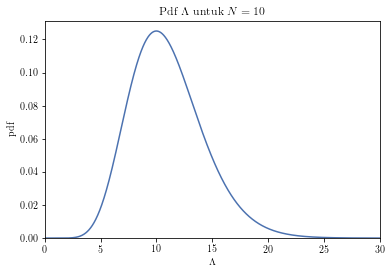

In [12]:
from scipy.stats import poisson

N = 10

x = np.linspace(0, 30, 1000)
y = poisson.pmf(N, x)

plt.plot(x, y)
plt.xlabel(r"$\Lambda$")
plt.ylabel(r"pdf")
plt.ylim(0)
plt.xlim(0, x.max())
plt.title(r"Pdf $\Lambda$ untuk $N=10$")
plt.savefig(join('img', 'poisson-pdf.pdf'), dpi=70)
plt.show()

# Go

check out high error data

In [14]:
zs = gaia['z'].to_numpy()
ws = gaia['w'].to_numpy()
ews = gaia['e_w'].to_numpy()
p = gaia['parallax'].to_numpy()/1000
e_p = gaia['e_parallax'].to_numpy()/1000
vr = gaia['rv'].to_numpy()
e_vr = gaia['rv_el'].to_numpy()
mub = gaia['pmlat'].to_numpy()/1000
e_mub = gaia['e_pmlat'].to_numpy()/1000
b = gaia['GLAT'].to_numpy()

mask = ~np.isnan(ws) & ~np.isnan(ews) 
ws = ws[mask]
ews = ews[mask]


med = np.median(ws)
mad = np.median(np.abs(ws-med))
BIN = 20
wedge = np.linspace(med-mad*6, med+mad*6, BIN+1)
wedge

array([-30.86364999, -28.42611613, -25.98858226, -23.5510484 ,
       -21.11351453, -18.67598067, -16.23844681, -13.80091294,
       -11.36337908,  -8.92584522,  -6.48831135,  -4.05077749,
        -1.61324362,   0.82429024,   3.2618241 ,   5.69935797,
         8.13689183,  10.57442569,  13.01195956,  15.44949342,
        17.88702728])

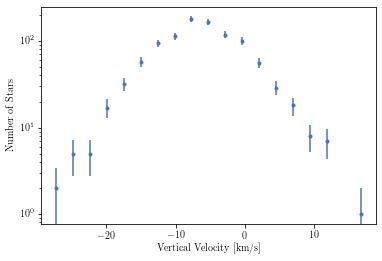

In [15]:
wmid = (wedge[1:] + wedge[:-1]) / 2
wnum, _ = np.histogram(ws, wedge)
mask = wnum > 0
wnum = wnum[mask]
wmid = wmid[mask]
werr = np.sqrt(wnum)
max = np.max(wnum)
# wnum, werr = wnum/max, werr/max
plt.errorbar(wmid, wnum, yerr=werr, fmt='.')
plt.xlabel("Vertical Velocity [km/s]")
plt.ylabel("Number of Stars")
plt.yscale("log")
# plt.axvline(-70)
plt.show()

In [16]:
from hammer import vertical

M = 100_000
# log_w = np.empty(M, dtype=float)
wnum_est = np.empty((M, len(wmid)), dtype=int)
n = len(ws)
mub_realizations = np.random.normal(loc=np.repeat(mub, M), scale=np.repeat(e_mub, M), size=n*M)
mub_realizations = mub_realizations.reshape((n, M)).transpose()
vr_realizations = np.random.normal(loc=np.repeat(vr, M), scale=np.repeat(e_vr, M), size=n*M)
vr_realizations = vr_realizations.reshape((n, M)).transpose()
r_realizations = vertical.generate_z(p, e_p, np.repeat(np.pi/2, n), n=M)
# for i, (mub_realization, vr_realization, r_realization) in enumerate(zip(mub_realizations.transpose(), vr_realizations.transpose(), r_realizations)):
for i, (mub_realization, vr_realization, r_realization) in enumerate(zip(tqdm(mub_realizations), vr_realizations, r_realizations)):
    # print(r_realization.shape)
    w_realization = 4.74 * r_realization * mub_realization*np.cos(b) + vr_realization*np.sin(b)
    wnum_est_i = np.histogram(w_realization, bins=wedge)[0]
    wnum_est[i] = wnum_est_i[mask]
# w_realization

100%|██████████| 100000/100000 [00:14<00:00, 7047.21it/s]


1.5081300258455022 0


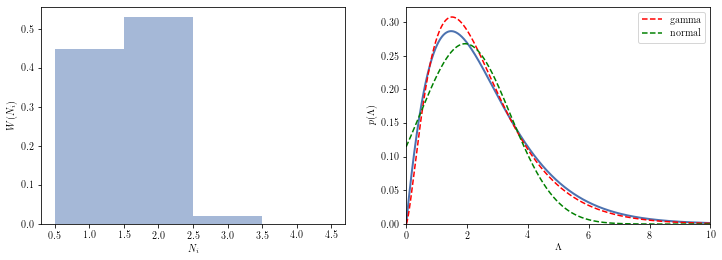

5.209325737602067 1


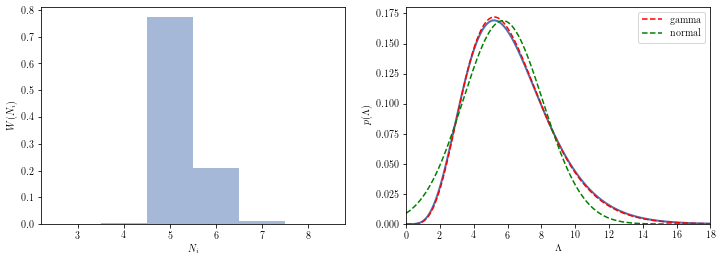

4.884743874607878 2


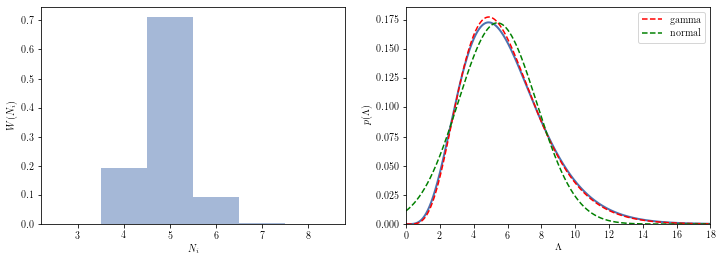

17.73653573466494 3


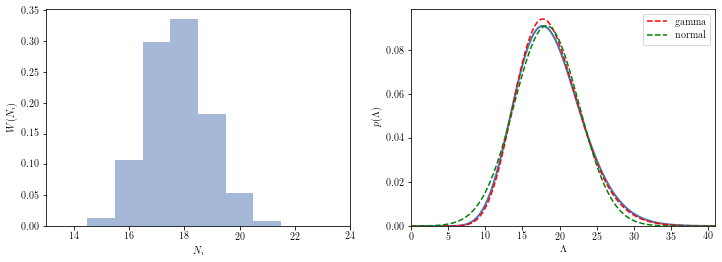

31.703569499036604 4


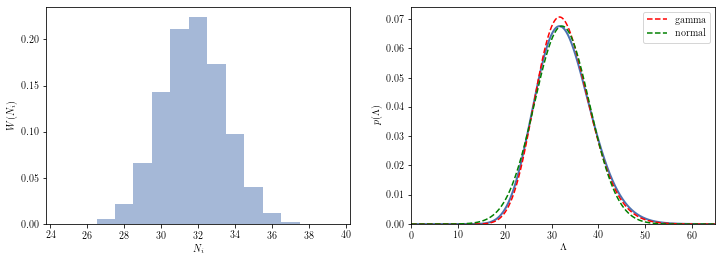

55.81725015680815 5


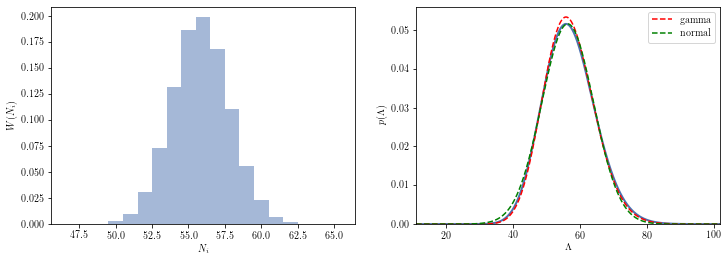

96.35286548361526 6


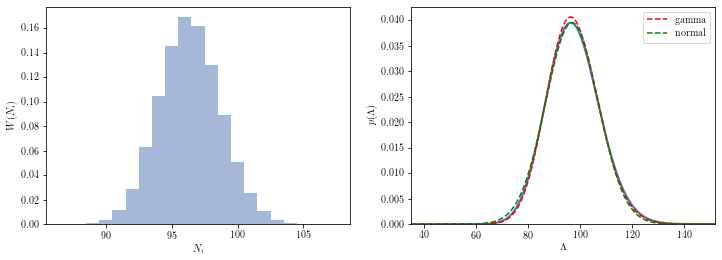

111.27672893180717 7


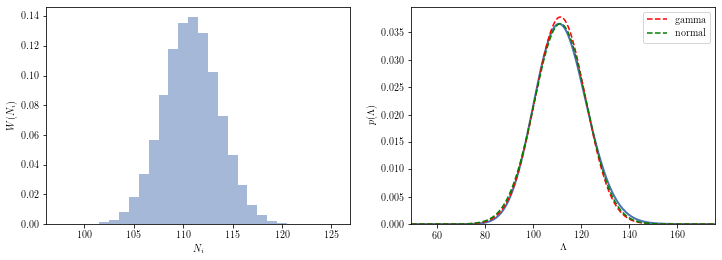

177.68743229808763 8


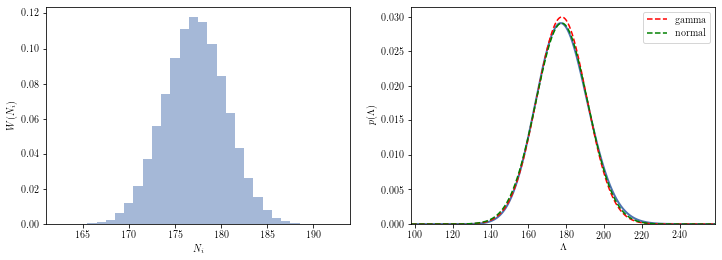

170.8727738648486 9


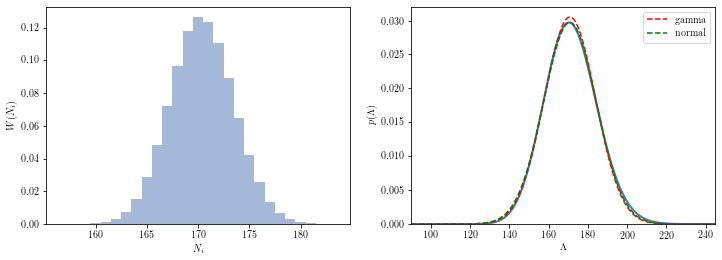

118.60733128713049 10


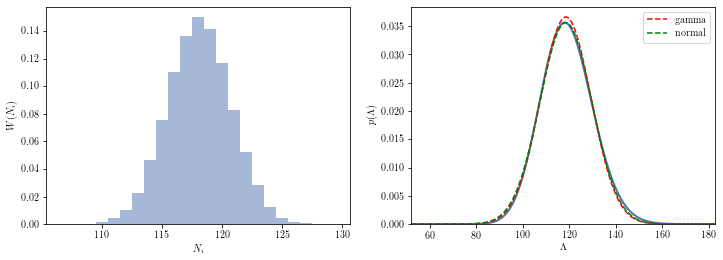

100.0 11


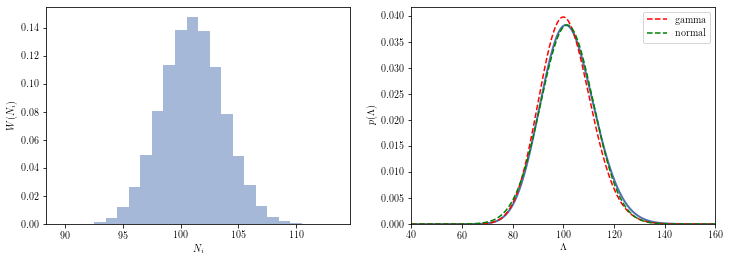

52.55565042693848 12


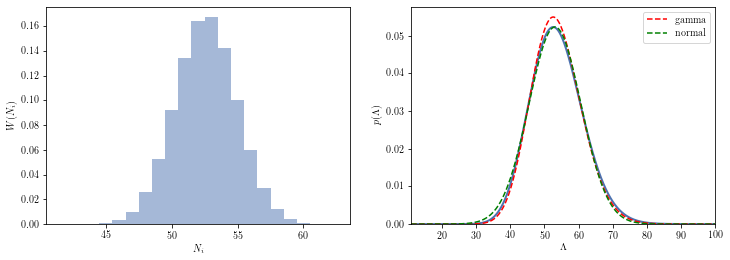

31.13430185778812 13


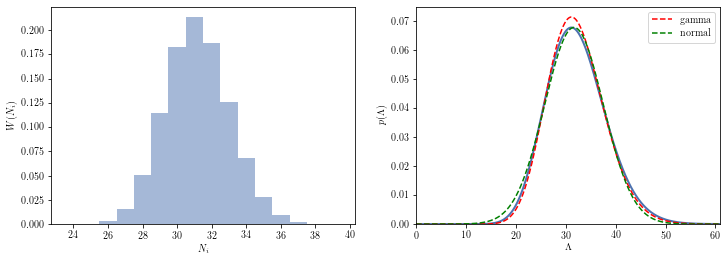

17.04856025765441 14


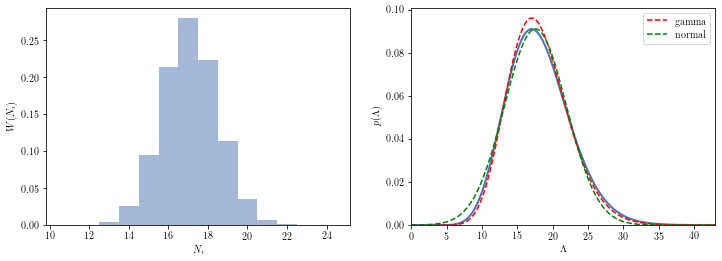

8.718641737850716 15


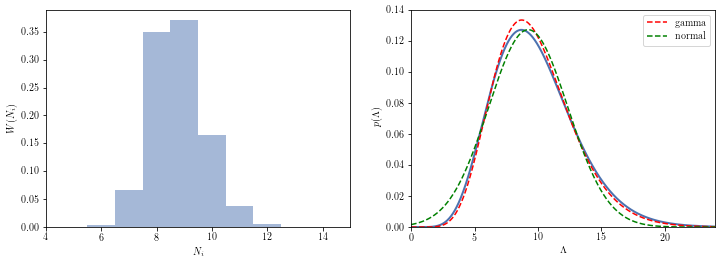

6.641005608397756 16


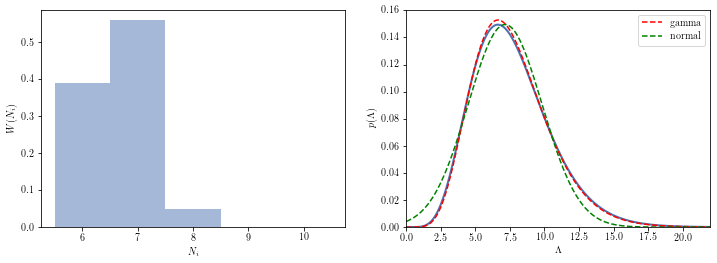

0.6558489600938183 17


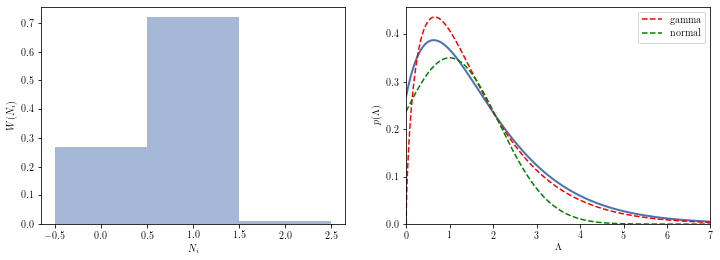

In [17]:
from scipy.special import gamma
from scipy.stats import norm
from scipy.optimize import curve_fit

def p_approx(x, n):
    if n > 100:
        return norm.pdf(x, n, np.sqrt(n))
    return np.power(x, n)*np.exp(-x)/gamma(n+1)

west = np.empty_like(wnum, dtype=float)
for i in range(len(wmid)):
    # if i != 15:
    #     continue
    wnum_est_min = np.floor(wnum_est[:, i].min())
    wnum_est_max = np.ceil(wnum_est[:, i].max())
    bins = np.arange(wnum_est_min-1/2, wnum_est_max+1)
    weight, wn_edge = np.histogram(wnum_est[:, i], bins=bins, density=True)
    wn_mid = (wn_edge[1:] + wn_edge[:-1]) / 2
    mask = weight > 0
    weight = weight[mask]
    wn_mid = wn_mid[mask]
    m = 6
    west_x = np.linspace(np.maximum(0, np.floor(wnum[i]-m*werr[i])), np.floor(wnum[i]+m*werr[i]), 10_000)
    dw = west_x[1] - west_x[0]
    pn = np.sum(weight[:, None]*poisson.pmf(wn_mid[:,None], west_x[None, :]), axis=0)
    area = np.trapz(pn, west_x)
    pn = pn / area
    popt_g, _ = curve_fit(p_approx, west_x, pn, p0=[wnum[i]])
    popt_n, _ = curve_fit(norm.pdf, west_x, pn, p0=[wnum[i], np.sqrt(wnum[i])])
    west[i] = popt_g[0]

    print(popt_g[0], i)
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    ax[0].bar(wn_mid, weight, width=1, alpha=0.5)
    ax[0].set_xlabel(r"$N_i$")
    ax[0].set_ylabel(r"$W(N_i)$")
    ax[1].plot(west_x, pn, c='C0', lw=2)
    ax[1].plot(west_x, p_approx(west_x, *popt_g), label='gamma', ls="--", c='r')
    ax[1].plot(west_x, norm.pdf(west_x, *popt_n), label='normal', ls="--", c='g')
    # ax[1].axvline(wnum[i], c='C3', ls='--', label='asli')
    ax[1].set_xlabel(r"$\Lambda$")
    ax[1].set_ylabel(r"$p(\Lambda)$")
    ax[1].set_ylim(0)
    ax[1].set_xlim(west_x.min(), west_x.max())
    ax[1].legend()
    # fig.savefig(join("img", f"histogram-approx-1.pdf"), dpi=70)
    plt.show()
    
    # break

In [18]:
west

array([  1.50813003,   5.20932574,   4.88474387,  17.73653573,
        31.7035695 ,  55.81725016,  96.35286548, 111.27672893,
       177.6874323 , 170.87277386, 118.60733129, 100.        ,
        52.55565043,  31.13430186,  17.04856026,   8.71864174,
         6.64100561,   0.65584896])

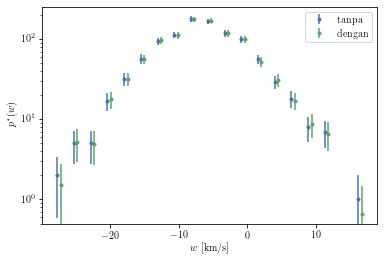

In [19]:
dw = np.min(np.diff(wedge))
plt.errorbar(wmid-0.5, wnum, yerr=werr, fmt='.', label="tanpa")
plt.errorbar(wmid, west, yerr=np.sqrt(west), fmt='.', label="dengan")
plt.xlabel(r"$w$ [km/s]")
plt.ylabel(r"$p^{*}(w)$")
plt.legend()
plt.yscale('log')
plt.savefig(join("img", f"histogram-w.pdf"), dpi=70)
plt.show()

In [20]:
name = files[index].split("/")[-1].replace("gaia", "w")
df = vaex.from_arrays(mid=wmid, num=west)
df

#,mid,num
0,-27.207349194286714,1.5081300258455022
1,-24.769815330544116,5.209325737602067
2,-22.33228146680152,4.884743874607878
3,-19.894747603058917,17.73653573466494
4,-17.457213739316316,31.703569499036604
...,...,...
13,4.48059103436708,31.13430185778812
14,6.9181248981096815,17.04856025765441
15,9.355658761852283,8.718641737850716
16,11.793192625594884,6.641005608397756


In [21]:
name

'w_(-0.019)_(0.127).hdf5'

In [22]:
vel_dir

'/home2/s20321005/Thesis-Project/Data/Velocity-Distribution/no'

In [23]:
df.export(join(vel_dir, name), progress=True)

export(hdf5) [########################################] 100.00% elapsed time  :     0.03s =  0.0m =  0.0h
 

# automate finding histogram with error

In [9]:
files

['/home2/s20321005/Thesis-Project/Data/Color/no/gaia_(-0.019)_(0.127).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/no/gaia_(0.127)_(0.190).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/no/gaia_(0.190)_(0.220).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/no/gaia_(0.220)_(0.242).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/no/gaia_(0.242)_(0.260).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/no/gaia_(0.260)_(0.276).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/no/gaia_(0.276)_(0.289).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/no/gaia_(0.289)_(0.301).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/no/gaia_(0.301)_(0.313).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/no/gaia_(0.313)_(0.325).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/no/gaia_(0.325)_(0.335).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/no/gaia_(0.335)_(0.345).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Color/no/gaia_(0.345)_(0.355).hdf5',
 '/home2/s2

100%|██████████| 50000/50000 [00:07<00:00, 7122.87it/s]


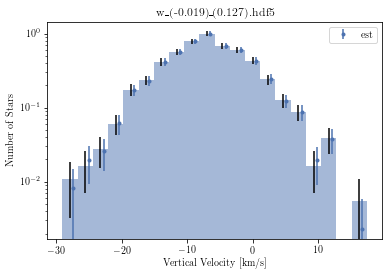

export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 saved w_(-0.019)_(0.127).hdf5


100%|██████████| 50000/50000 [00:07<00:00, 6754.71it/s]


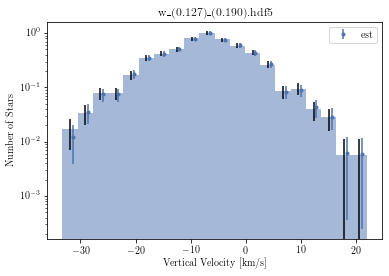

export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 saved w_(0.127)_(0.190).hdf5


100%|██████████| 50000/50000 [00:07<00:00, 7088.54it/s]


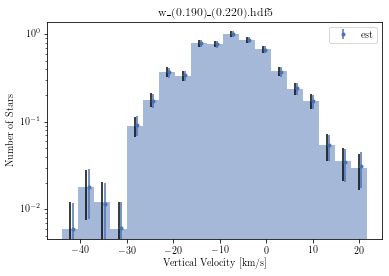

export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 saved w_(0.190)_(0.220).hdf5


100%|██████████| 50000/50000 [00:07<00:00, 6683.07it/s]


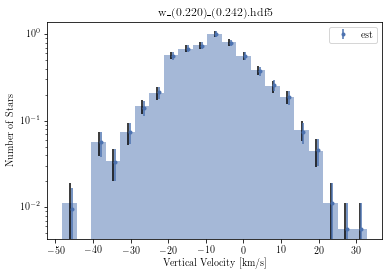

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved w_(0.220)_(0.242).hdf5


100%|██████████| 50000/50000 [00:07<00:00, 6931.10it/s]


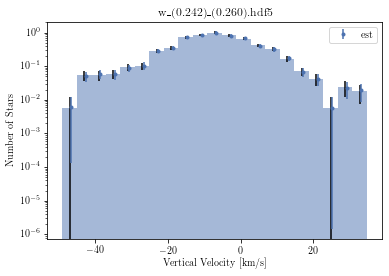

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved w_(0.242)_(0.260).hdf5


100%|██████████| 50000/50000 [00:07<00:00, 6668.09it/s]


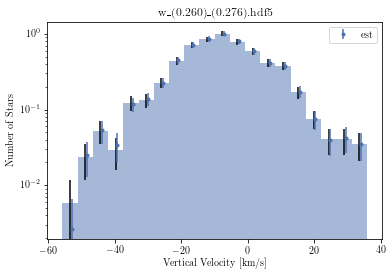

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved w_(0.260)_(0.276).hdf5


100%|██████████| 50000/50000 [00:07<00:00, 7025.95it/s]


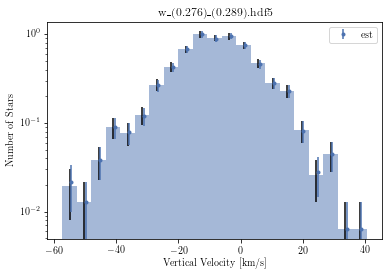

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved w_(0.276)_(0.289).hdf5


100%|██████████| 50000/50000 [00:07<00:00, 6650.15it/s]


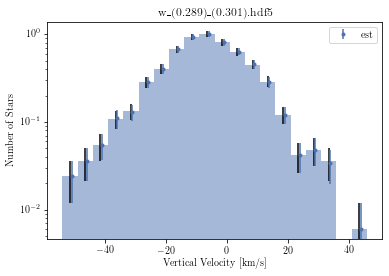

export(hdf5) [########################################] 100.00% elapsed time  :     0.04s =  0.0m =  0.0h
 saved w_(0.289)_(0.301).hdf5


100%|██████████| 50000/50000 [00:07<00:00, 6439.22it/s]


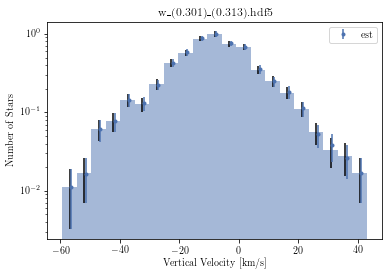

export(hdf5) [########################################] 100.00% elapsed time  :     0.03s =  0.0m =  0.0h
 saved w_(0.301)_(0.313).hdf5


100%|██████████| 50000/50000 [00:07<00:00, 6600.17it/s]


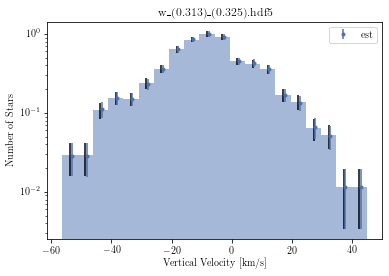

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved w_(0.313)_(0.325).hdf5


100%|██████████| 50000/50000 [00:07<00:00, 6952.40it/s]


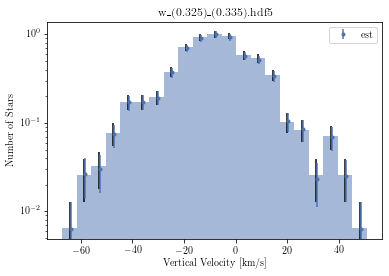

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved w_(0.325)_(0.335).hdf5


100%|██████████| 50000/50000 [00:06<00:00, 7257.23it/s]


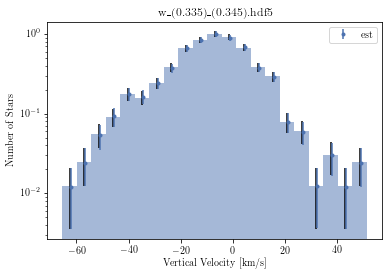

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved w_(0.335)_(0.345).hdf5


100%|██████████| 50000/50000 [00:07<00:00, 6786.07it/s]


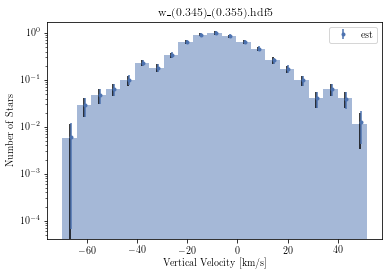

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved w_(0.345)_(0.355).hdf5


100%|██████████| 50000/50000 [00:07<00:00, 6665.66it/s]


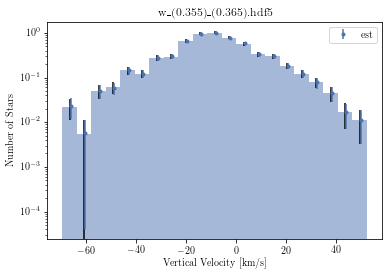

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved w_(0.355)_(0.365).hdf5


100%|██████████| 50000/50000 [00:07<00:00, 7016.93it/s]


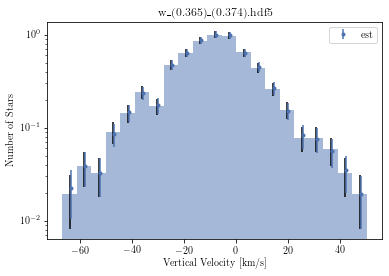

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 saved w_(0.365)_(0.374).hdf5


In [10]:
from scipy.special import gamma
from scipy.stats import norm
from scipy.optimize import curve_fit
from hammer import vertical

def p_approx(x, n):
    if n > 100:
        return norm.pdf(x, n, np.sqrt(n))
    return np.power(x, n)*np.exp(-x)/gamma(n+1)

for file in files:
    gaia = vaex.open(file)
    gaia = gaia.filter("abs(z)<50").filter("rv>-999")
    gaia = gaia.extract()
    ws = gaia['w'].to_numpy()
    ews = gaia['e_w'].to_numpy()
    p = gaia['parallax'].to_numpy()/1000
    e_p = gaia['e_parallax'].to_numpy()/1000
    vr = gaia['rv'].to_numpy()
    e_vr = gaia['rv_el'].to_numpy()
    mub = gaia['pmlat'].to_numpy()/1000
    e_mub = gaia['e_pmlat'].to_numpy()/1000
    b = gaia['GLAT'].to_numpy()
    mask = ~np.isnan(ws) & ~np.isnan(ews)
    ws = ws[mask]
    ews = ews[mask]

    med = np.median(ws)
    mad = np.median(np.abs(ws-med))
    BIN = 21
    wedge = np.linspace(med-mad*6, med+mad*6, BIN+1)

    wmid = (wedge[1:] + wedge[:-1]) / 2
    wnum, _ = np.histogram(ws, wedge)
    # mask = (wnum == 0) | ((wmid < -30) & (wmid > -45)) | (wmid < -70)
    mask = (wnum == 0)
    wnum = wnum[~mask]
    wmid = wmid[~mask]
    werr = np.sqrt(wnum)
    max = np.max(wnum)
    
    # plt.errorbar(wmid, wnum, yerr=werr, fmt='.')
    # plt.xlabel("Vertical Velocity [km/s]")
    # plt.ylabel("Number of Stars")
    # plt.yscale('log')
    # plt.show()
    # continue
    # break
    M = 50_000
    # log_w = np.empty(M, dtype=float)
    wnum_est = np.empty((M, len(wmid)), dtype=int)
    n = len(ws)
    mub_realizations = np.random.normal(loc=np.repeat(mub, M), scale=np.repeat(e_mub, M), size=n*M)
    mub_realizations = mub_realizations.reshape((n, M)).transpose()
    vr_realizations = np.random.normal(loc=np.repeat(vr, M), scale=np.repeat(e_vr, M), size=n*M)
    vr_realizations = vr_realizations.reshape((n, M)).transpose()
    r_realizations = vertical.generate_z(p, e_p, np.repeat(np.pi/2, n), n=M)
    # for i, (mub_realization, vr_realization, r_realization) in enumerate(zip(mub_realizations.transpose(), vr_realizations.transpose(), r_realizations)):
    for i, (mub_realization, vr_realization, r_realization) in enumerate(zip(tqdm(mub_realizations), vr_realizations, r_realizations)):
        # print(r_realization.shape)
        w_realization = 4.74 * r_realization * mub_realization*np.cos(b) + vr_realization*np.sin(b)
        wnum_est_i = np.histogram(w_realization, bins=wedge)[0]
        wnum_est[i] = wnum_est_i[~mask]
    west = np.empty_like(wnum, dtype=float)
    for i in range(len(wmid)):
        wnum_est_min = np.floor(wnum_est[:, i].min())
        wnum_est_max = np.ceil(wnum_est[:, i].max())
        bins = np.arange(wnum_est_min-1/2, wnum_est_max+1)
        weight, wn_edge = np.histogram(wnum_est[:, i], bins=bins, density=True)

        wn_mid = (wn_edge[1:] + wn_edge[:-1]) / 2
        mask = weight > 0
        weight = weight[mask]
        wn_mid = wn_mid[mask]
        m = 6
        # plt.bar(wn_mid, weight, width=1, alpha=0.5)
        west_x = np.linspace(np.maximum(0, np.floor(wnum[i]-m*werr[i])), np.floor(wnum[i]+m*werr[i]), 1_000)
        dw = west_x[1] - west_x[0]
        pn = np.sum(weight[:, None]*poisson.pmf(wn_mid[:,None], west_x[None, :]), axis=0)
        area = np.trapz(pn, west_x)
        pn = pn / area
        popt_g, _ = curve_fit(p_approx, west_x, pn, p0=[wnum[i]])
        popt_n, _ = curve_fit(norm.pdf, west_x, pn, p0=[wnum[i], np.sqrt(wnum[i])])
        west[i] = popt_g[0]
        # fig, ax = plt.subplots(1, 2, figsize=(12, 4))
        # ax[0].bar(wn_mid, weight, width=1, alpha=0.5, edgecolor='k')
        # ax[0].set_xlabel(r"$N_i$")
        # ax[0].set_ylabel(r"$W(N_i)$")
        # ax[1].plot(west_x, pn, c='C0', lw=2)
        # ax[1].plot(west_x, p_approx(west_x, *popt_g), label='gamma', ls="--", c='r')
        # ax[1].plot(west_x, norm.pdf(west_x, *popt_n), label='normal', ls="--", c='g')
        # # ax[1].axvline(wnum[i], c='C3', ls='--', label='asli')
        # ax[1].set_xlabel(r"$\Lambda$")
        # ax[1].set_ylabel(r"$p(\Lambda)$")
        # ax[1].set_ylim(0)
        # ax[1].set_xlim(west_x.min(), west_x.max())
        # ax[1].legend()
        # # fig.savefig(join("img", f"histogram-approx-1.pdf"), dpi=70)
        # plt.show()
    #     break
    # break
    name = file.split("/")[-1].replace("gaia", "w")
    dw = np.min(np.diff(wedge))
    plt.bar(wmid-0.5, wnum/wnum.max(), yerr=werr/wnum.max(), width=dw, alpha=0.5)
    plt.errorbar(wmid, west/west.max(), yerr=np.sqrt(west)/west.max(), fmt='.', label="est")
    plt.xlabel("Vertical Velocity [km/s]")
    plt.ylabel("Number of Stars")
    plt.legend()
    plt.title(name)
    plt.yscale('log')
    plt.show()
    
    
    df = vaex.from_arrays(mid=wmid, num=west)

    df.export(join(vel_dir, name), progress=True)
    print("saved", name) 
    # break